# Active Noise Cancellation

In [5]:
#Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import scipy.io as sio
from scipy import signal

# create a function called activefilter that takes three 
# inputs: an x array, an nref array, and a filter length p.
# this function will implement the matrix notation introduced 
# in class and return two variables: an estimated filter h and 
# the clean signal shat.

def activefilter(x_array, nref_array, p):
    from scipy import linalg
    #implement array notation introduced in class
    A = linalg.toeplitz(nref[(p-1):],nref[:p][::-1])
    
    #create filter of p length
    xsub = x[(p-1):]
    h = np.dot(linalg.pinv(A), xsub)
    
    #apply filter to signal and subtract filtered noise from data to deliver clean signal
    from scipy import signal
    nhat = signal.lfilter(h, 1, nref)
    shat = x - nhat
    return [shat, h]

In [6]:
#Generate sine wave to test function
fs = 8000 
t = np.arange(0, 1, 1/fs) # 1 second plot
x = np.sin(2 * np.pi * 10 * t)
h_true = np.random.randn(25)
#Create white noise array with variance 1 same length as sine wave
nref = np.random.normal(0,1,size=x.shape)
nref2 = signal.lfilter(h_true, 1, nref)
x = x + nref2
p = 25

## Plot the raw signal vs the filtered signal and h true vs hhat.

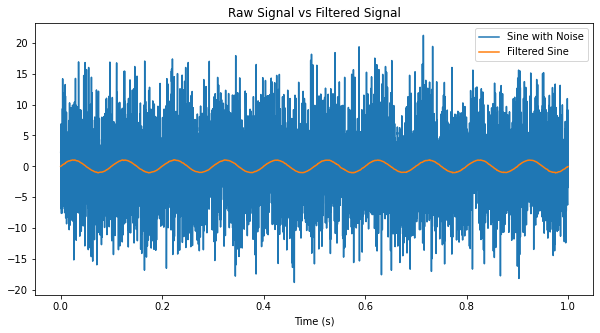

In [7]:
# Use filter to determine shat and h estimate
(shat, h) = activefilter(x, nref, p)
#plot raw signal vs shat
pl.figure(figsize=(10,5))
pl.plot(t, x)
pl.plot(t, shat)
pl.title('Raw Signal vs Filtered Signal')
pl.xlabel('Time (s)')
pl.legend(["Sine with Noise","Filtered Sine"])
pl.show()

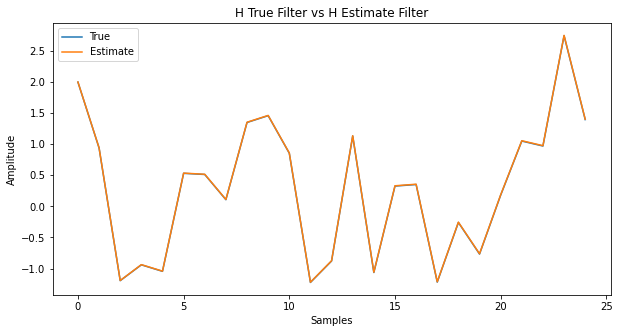

In [8]:
# plot the true filter and the estimated filter
pl.figure(figsize=(10,5))
pl.plot(h_true)
pl.plot(h)
pl.title('H True Filter vs H Estimate Filter')
pl.xlabel('Samples')
pl.ylabel('Amplitude')
pl.legend(["True","Estimate"])
pl.show()

In [9]:
noisysignal = sio.loadmat('noisyspeech.mat',squeeze_me=True)
x = noisysignal['x']
nref = noisysignal['nref']
fs = noisysignal['fs']

In [10]:
p = 128 #[8, 16, 32, 64, 128, 245] values to try for p
t_n = np.arange(0, x.shape[0])/fs
(shat_n, h_n) = activefilter(x, nref, p)

In [11]:
(shat_256, h_256) = activefilter(x, nref, 256)

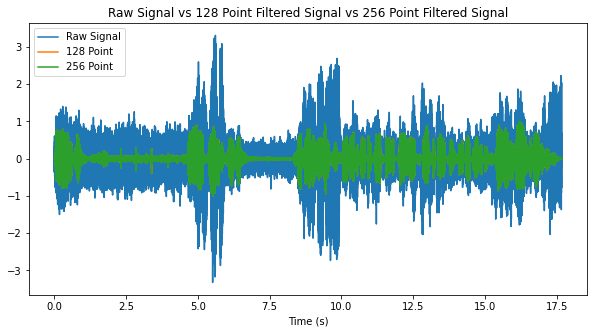

In [12]:
#plot raw signal vs shat for 128 point and 256 point
pl.figure(figsize=(10,5))
pl.plot(t_n, x)
pl.plot(t_n, shat_n)
pl.plot(t_n, shat_256)
pl.title('Raw Signal vs 128 Point Filtered Signal vs 256 Point Filtered Signal')
pl.xlabel('Time (s)')
pl.legend(["Raw Signal","128 Point","256 Point"])
pl.show()

After trying all the p values I found that 128 is the best filter, as it delivers the same performance as 256 and better than 64.

In [13]:
#import and listen to audio
from IPython.display import Audio
# audio with 128
Audio(data=shat_n, rate=fs)

In [14]:
#audio with 256 
Audio(data=shat_256, rate=fs)

The 128 point filter works just as well as the 256 in filtering the noise in the background. We can see this from the plot there is no difference whatso ever between the 128 and the 256 point filters.The same can be heard in the audio files. 

We can see below that a simple subtraction of nref does not work well, since the amplitude of the noise reference is different than that of the noise in the audio file.

In [16]:
#audio from file
Audio(data=x, rate=fs)

In [17]:
shat_sub = x - nref
#audio by subtracting nref from signal
Audio(data=shat_sub, rate=fs)